# Tarea 4: "Aprendizaje no supervisado"

In [0]:
import pandas as pd
import seaborn as sn
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
 
%matplotlib inline

D:\Anaconda\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


Cargamos la base de datos previamente preprocesada

In [0]:
df = pd.read_csv('BaseDatos_Mod.csv',sep=',')

In [0]:
df.columns

Index(['Unnamed: 0', 'Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot',
       'TP', 'ALB', 'AG', 'Class'],
      dtype='object')

In [0]:
df = df.drop(['Unnamed: 0'], axis=1)
df.columns

Index(['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB',
       'AG', 'Class'],
      dtype='object')

Partición en train y test


In [0]:
from sklearn.model_selection import train_test_split

df_data=df.iloc[:,[0,1,2,3,4,5,6,7,8,9]]
target=df['Class']

X_train, X_test, y_train, y_test = train_test_split(df_data, target, test_size=0.2, random_state=0)

## Análisis de Componentes Principales

In [0]:
X_train.columns

Index(['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB',
       'AG'],
      dtype='object')

In [0]:
X_train.shape

(466, 10)

In [0]:
scaler=StandardScaler() #normalizamos los datos para poder aplicar PCA


scaler.fit(X_train) # calculo la media para poder hacer la transformacion
X_nor=scaler.transform(X_train)# Normalizo los datos y los normalizo

Calculo la matriz de correlación porque está difinida entre 1 y -1 

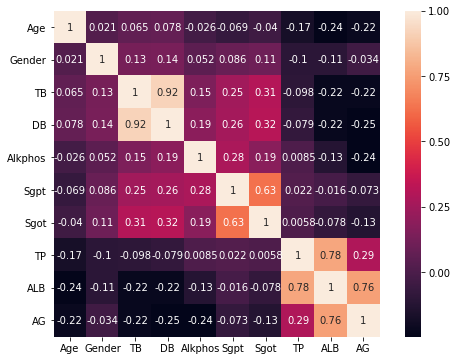

In [0]:

matplotlib.rcParams['figure.figsize'] = (9.0, 6.0)
sns.heatmap(X_train.corr(), square=True, annot=True)

Componentes con mayor correlación lineal:
- DB y TB
- Sgot y Sgpt
- ALB y TP
- AG y ALB

Componentes con menor correlación: 
- gender
- alkphos
- age

Nuestras compoentes principales son aquellas con menor correlación lineal, ya que eso nos dice que son independientes del resto y nos dan más información ellas solas. Las variables con muchas correlación lineal nos dicen que ya hay otra variable que nos da información, por lo que es descartable

--> Vamos a poder prescindir de una de las variables de la pareja DB y TB y otra de las variables de la pareja Sgot y Sgpt

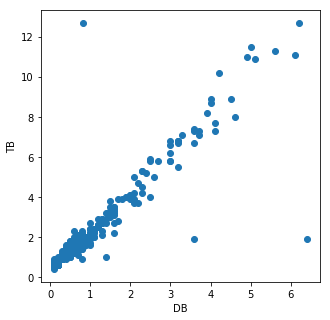

In [0]:
#Las 2 últimas componentes principales ya que tienen mucha relación lineal entre ellas 
# scatter plot
matplotlib.rcParams['figure.figsize'] = (5.0, 5.0)
plt.scatter(X_train['DB'],X_train['TB'])
plt.ylabel('TB')
plt.xlabel('DB')
plt.show()

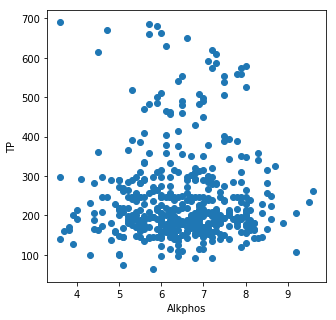

In [0]:
# los dos primeras componentes principales, ya que no hay apena correlacion lineal lo que nos dice que las 2 nos dan mucha información por si solas
matplotlib.rcParams['figure.figsize'] = (5.0, 5.0)
plt.scatter(X_train['TP'],X_train['Alkphos'])
plt.ylabel('TP')
plt.xlabel('Alkphos')
plt.show()

shape of X_pca (466, 10)
[0.29241205 0.20120333 0.12130161 0.09977952 0.08954818 0.08759733
 0.0601043  0.035321   0.00767991 0.00505276]
suma: 0.891842024437168


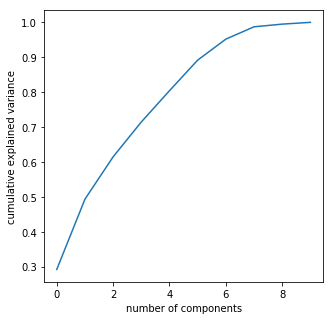

In [0]:
#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components=10) # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca.fit(X_nor) # obtener los componentes principales
X_pca=pca.transform(X_nor) # convertimos nuestros datos con las nuevas dimensiones de PCA
 
print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:6]))
#Vemos que con 5 componentes tenemos algo mas del 85% de varianza explicada
 
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
matplotlib.rcParams['figure.figsize'] = (5.0, 5.0)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


Con esta grafica vemos el acumulado de varianza de las componentes transformadas y vemos que con 6 variables tenemos mas del  0.85 

Esto significa que con 6 variables tenemos suficiente información

In [0]:
components = pd.DataFrame(pca.components_, columns = X_train.columns)
components

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG
0,0.134959,0.139147,0.423747,0.431776,0.217486,0.257366,0.289889,-0.280148,-0.415185,-0.384706
1,-0.255486,0.038826,0.244941,0.250446,0.147339,0.400455,0.373155,0.442023,0.454616,0.295164
2,0.169740,0.039365,0.494256,0.473575,-0.374382,-0.430911,-0.342863,0.103463,0.138165,0.166979
3,0.118157,-0.850305,0.069315,0.088975,0.321062,-0.069469,-0.116869,0.252701,0.024621,-0.253515
4,-0.670418,0.230834,0.070918,0.081862,0.506122,-0.278779,-0.363602,0.035628,-0.054350,-0.123356
5,-0.629983,-0.420731,0.092355,0.049395,-0.481698,0.078191,0.149215,-0.344628,-0.160644,0.100747
6,-0.164979,0.152509,-0.071957,-0.051381,-0.412851,-0.101816,0.163552,0.551960,-0.062541,-0.652359
7,0.007945,-0.028145,-0.026052,-0.015354,0.168205,-0.698620,0.681189,-0.055360,0.006092,0.121436
8,-0.010509,-0.005304,-0.701379,0.711500,-0.025410,0.003278,-0.006879,-0.014157,-0.011455,0.025708
9,0.003061,-0.013560,-0.001192,-0.020164,0.013097,0.024693,-0.014820,0.472871,-0.753930,0.454292


En la tabla de las componentes de la PCA podemos ver el valor del eigenvector de cada variable

pc1-DB
pc2-ALB
pc3-Sgpt
pc4-gender
pc5-age
pc6-alkphos

In [0]:
X=X_nor
n_samples = X.shape[0]
# We center the data and compute the sample covariance matrix.
X -= np.mean(X, axis=0)
cov_matrix = np.dot(X.T, X) / n_samples
for eigenvector in pca.components_:
    print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))

2.9241204733608814
2.0120333061185125
1.2130161259628363
0.9977952011303133
0.8954818295726945
0.8759733082264491
0.6010430244777304
0.35321004136093614
0.07679913857663476
0.05052755121302098


Hacemos una reducción de dimensionalidad, en la que unicamente vamos a tener en cuenta las primeras componentes principales ya que ellas aportan sufuciente información al modelo

In [0]:
#reduccion
pca=PCA(0.85)
pca.fit(X_nor)
X_red=pca.transform(X_nor)
X_red.shape

(466, 6)

D:\Anaconda\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


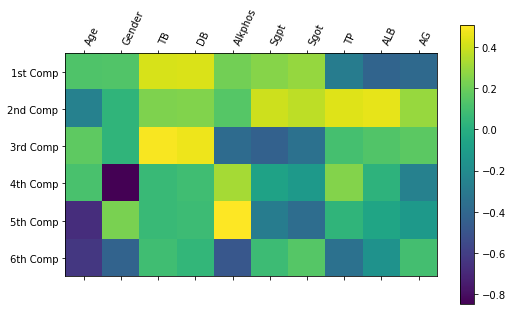

In [0]:
plt.matshow(pca.components_[0:7],cmap='viridis')
plt.yticks([0,1,2,3,4,5],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp','6th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(X_train.columns)),X_train.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()

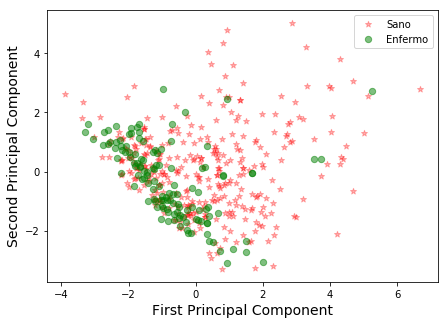

In [0]:
Xax=X_red[:,0]
Yax=X_red[:,1]
labels=y_train.values
cdict={1:'red',2:'green'}
labl={1:'Sano',2:'Enfermo'}
marker={1:'*',2:'o'}
alpha={1:.3, 2:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l],s=40,marker=marker[l],alpha=alpha[l])
 
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()

## Algoritmo k-medias

#### Usando las varibles iniciales

In [0]:
X=X_train

In [0]:
sscores = []
for cls in range(11):
    clustering = KMeans(n_clusters=cls+2)
    clustering.fit(X)
    sscore = silhouette_score(X, clustering.labels_, metric='euclidean')
    sscores.append(sscore)

prestaciones_i = pd.DataFrame({'No Clusters': range(2,13), 'Silhouette Score': sscores})
val_silueta=sscores
print(sscores)

[0.6106271846588922, 0.5451292297353638, 0.4459641327812447, 0.4585224284377023, 0.41679623704016233, 0.27949234778907156, 0.2795988111940119, 0.27327025433621555, 0.2756222758319662, 0.29718038558824555, 0.252518841821267]


Text(0.5,0,'No. Clusters')

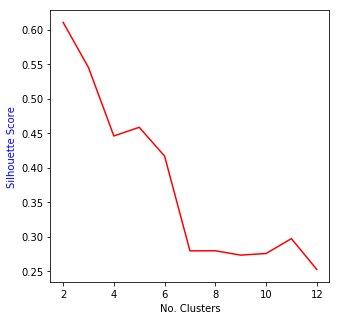

In [0]:
fig = plt.figure()
plt.plot(prestaciones_i['No Clusters'], prestaciones_i['Silhouette Score'], 'r-')
plt.ylabel('Silhouette Score', color = 'b')
plt.xlabel('No. Clusters', color = 'black')

In [0]:
print('El mayor más alto de silueta se da para k: ',(sscores.index(max(sscores))+2), '-->',max(sscores))


El mayor más alto de silueta se da para k:  2 --> 0.6106271846588922


D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


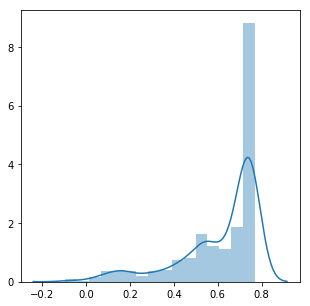

In [0]:
from sklearn import metrics


clustering = KMeans(2).fit(X)

y_cluster_kmeans = clustering.predict(X)
centroids = clustering.cluster_centers_

labels = clustering.predict(X)
C = clustering.cluster_centers_
scores = metrics.silhouette_samples(X, y_cluster_kmeans)
sns.distplot(scores);

In [0]:
#visualizar

#### Usando las variables transformadas


In [0]:
X=X_red

In [0]:
sscores = []
for cls in range(11):
    clustering = KMeans(n_clusters=cls+2)
    clustering.fit(X)
    y_cluster_kmeans = clustering.predict(X)
    sscore = silhouette_score(X, clustering.labels_, metric='euclidean')
    #sscore = silhouette_score(X, y_cluster_kmeans, metric='euclidean')
    sscores.append(sscore)

prestaciones_t = pd.DataFrame({'No Clusters': range(2,13), 'Silhouette Score': sscores})
val_silueta=sscores
print(sscores)

[0.2479627419886688, 0.21934100593337458, 0.23629313332971114, 0.22892145929231977, 0.2352896887098556, 0.24174496650728708, 0.22085470151473593, 0.2199032398664232, 0.21796368581294676, 0.21010566928575064, 0.19469696960545727]


Text(0.5,0,'No. Clusters')

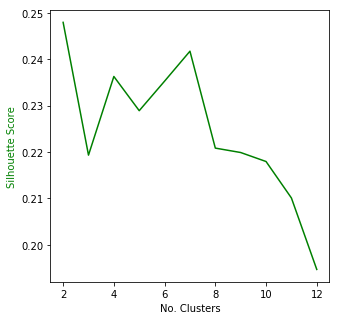

In [0]:
fig = plt.figure()
plt.plot(prestaciones_t['No Clusters'], prestaciones_t['Silhouette Score'], 'g-')
plt.ylabel('Silhouette Score', color = 'g')
plt.xlabel('No. Clusters', color = 'black')

In [0]:
print('El mayor más alto de silueta se da para k: ',(sscores.index(max(sscores))+2), '-->',max(sscores))

El mayor más alto de silueta se da para k:  2 --> 0.2479627419886688


D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


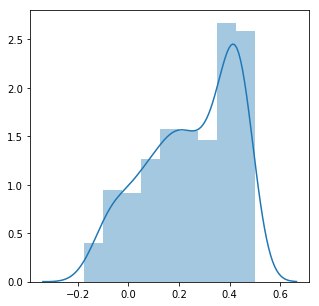

In [0]:

clustering = KMeans(2).fit(X)

y_cluster_kmeans = clustering.predict(X)

scores = metrics.silhouette_samples(X, y_cluster_kmeans)
sns.distplot(scores);

In [0]:
#visualizar

------------------------------------------------------------------------------------------------------------

### Comparación de resultados

Text(0.5,0,'No. Clusters')

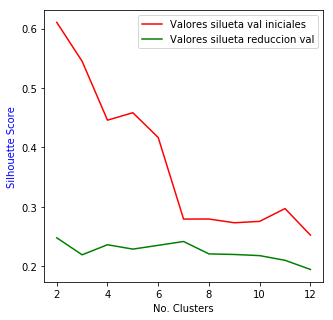

In [0]:
plt.plot(prestaciones_i['No Clusters'], prestaciones_i['Silhouette Score'], 'r-',label='Valores silueta val iniciales')
plt.plot(prestaciones_t['No Clusters'], prestaciones_t['Silhouette Score'], 'g-',label='Valores silueta reduccion val')
plt.legend(loc='upper right')
plt.ylabel('Silhouette Score', color = 'b')
plt.xlabel('No. Clusters', color = 'black')

------------------------------------------------------------------------------------------------------------